In [1]:
import numpy as np
import numpy.random as random
import importlib
import tqdm
import time
import keras
import pickle
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import os

2022-11-21 06:48:18.302242: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tttn_funcs as T

Simple  5 x 5 game


In [3]:
import importlib

In [4]:
importlib.reload(T);

Simple  5 x 5 game


In [3]:
T.setN(3)

In [4]:
os.chdir("./final_results/3x3/")

## Figures for rules section

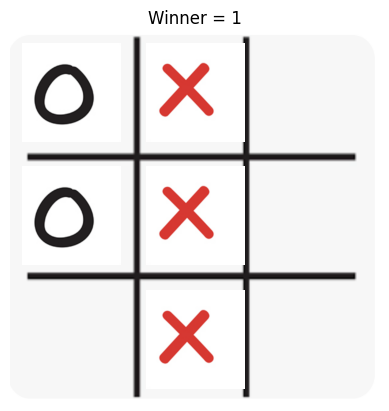

In [19]:
moves = [ (1,[1,1]), (2,[0,0]), (1,[0, 1]), (2, [1,0]), (1, [2, 1])]
T.saveMoves(moves, path="./rules/")

Generating MS data

In [5]:
start_time = time.perf_counter()
# games = [T.simulateGame() for _ in tqdm.tqdm(range(10000))]
# with open("./games.dat", "wb") as file:
#     pickle.dump(games, file)
with open("./games.dat", "rb") as file:
    games = pickle.load(file)
X_train, X_test, y_train, y_test = T.gamesToWinLossData(games)
print( time.perf_counter() - start_time, "secs")

0.7012621729999999 secs


In [6]:
start_time = time.perf_counter()
model = T.getModel()
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)
# model.save_weights("./modelFCN")
# with open("./histFCN.dat", "wb") as file:
#     pickle.dump(history, file)
model.load_weights("./modelFCN").expect_partial()
with open("./histFCN.dat", "rb") as file:
    history = pickle.load(file)
print( time.perf_counter() - start_time, "secs")

2022-11-21 06:48:37.317730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.4303028260000019 secs


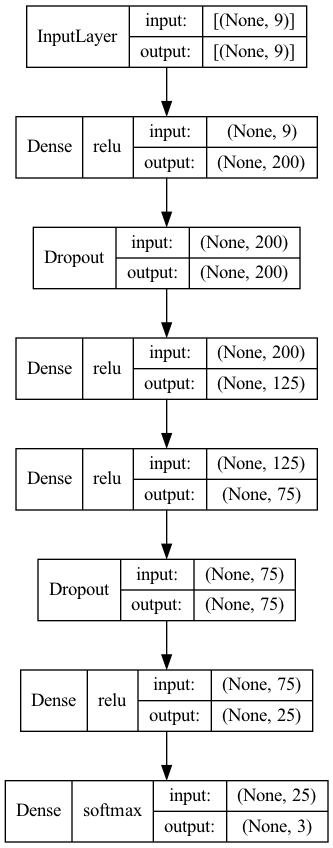

In [9]:
keras.utils.plot_model(model, to_file="../FCNmodel.png", show_shapes=True, show_layer_names=False, show_layer_activations=True)

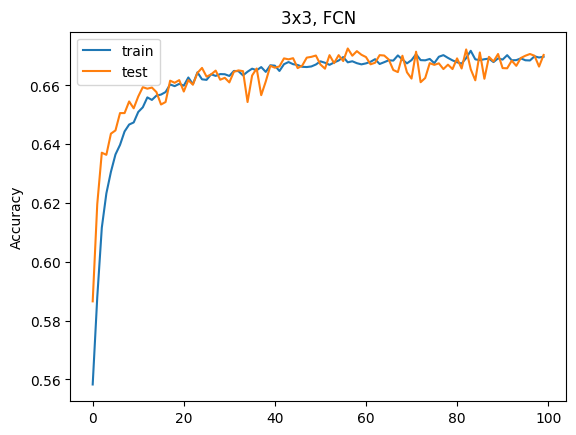

In [8]:
plt.plot(history.history["acc"], label = "train")
plt.plot(history.history["val_acc"], label = "test")
plt.legend()
plt.ylabel("Accuracy")
plt.title("3x3, FCN")
plt.savefig("./accuracy_FCN.png")

In [23]:
T.printMoves(T.simulateGame(p1=model, p2=None))

|X X   |
|  X 0 |
|0 X 0 |
Winner: 1


In [10]:
moves = T.simulateGame(p1=model, p2=None, rnd = 0.1)
T.playMoves(moves)

|0     |
|X X X |
|0 0 X |
Winner: 1


None

In [13]:
start_time = time.perf_counter()
cnnModel = T.getCNNModel()
# cnnHistory = cnnModel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)
# cnnModel.save_weights("./modelCNN")
# with open("./histCNN.dat", "wb") as file:
#     pickle.dump(cnnHistory, file)
cnnModel.load_weights("./modelCNN").expect_partial()
with open("./histCNN.dat", "rb") as file:
    cnnHistory = pickle.load(file)
print( time.perf_counter() - start_time, "secs")

0.6495777489999455 secs


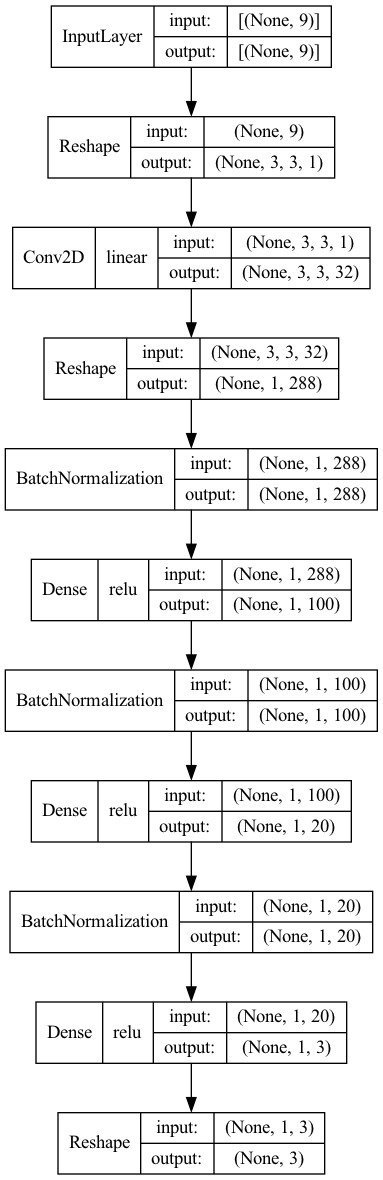

In [15]:
keras.utils.plot_model(cnnModel, to_file="../CNNmodel.png", show_shapes=True, show_layer_names=False, show_layer_activations=True)

In [14]:
cnnHistory.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

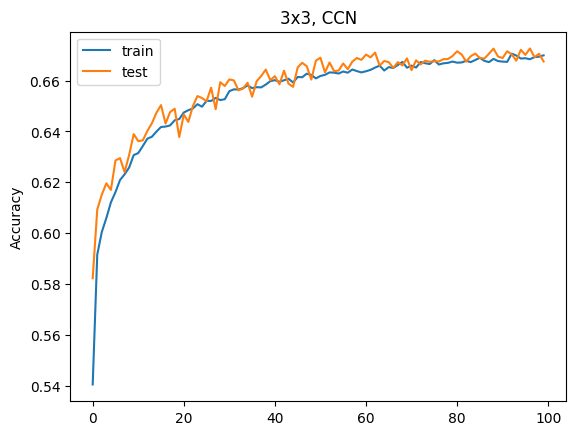

In [16]:
plt.plot(cnnHistory.history["accuracy"], label = "train")
plt.plot(cnnHistory.history["val_accuracy"], label = "test")
plt.legend()
plt.ylabel("Accuracy")
plt.title("3x3, CCN")
plt.savefig("./accuracy_CNN.png")

Show simulations

In [ ]:
1

In [18]:
np.random.seed(123)
moves = T.simulateGame(p1=cnnModel, p2 = model,d=0, rnd = 0)
T.playMoves(moves)

|0   0 |
|X X X |
|  0 X |
Winner: 1


None

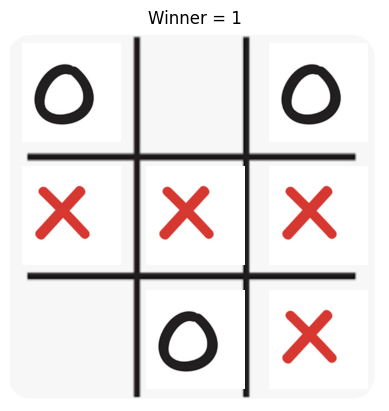

In [46]:
moves = T.simulateGame(p1=model, p2=model)
T.saveMoves(moves, "./game_fcnLast/")

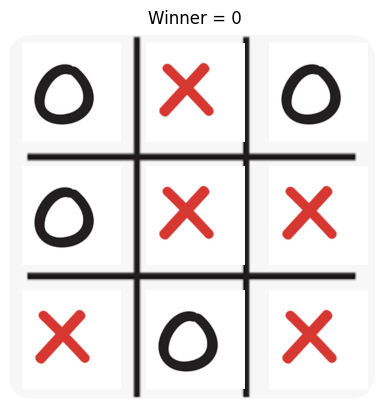

In [45]:
moves = T.simulateGame(p1=model, p2=cnnModel)
T.saveMoves(moves, "./game_cnnLast/")

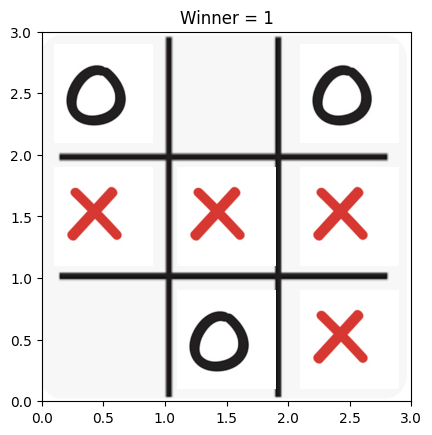

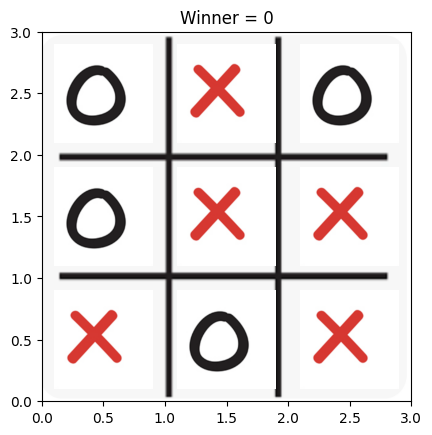

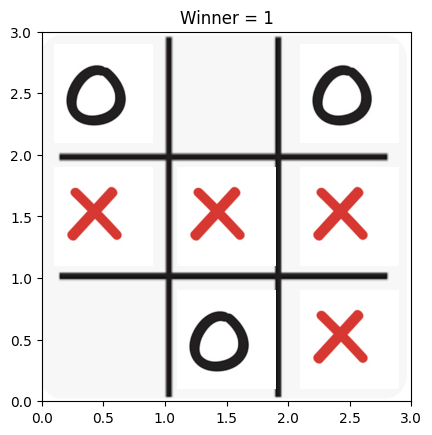

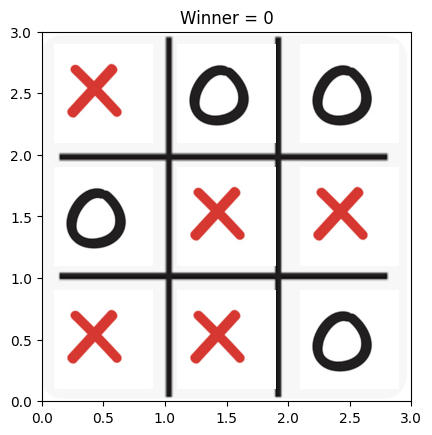

In [35]:
models = [model, cnnModel]
R = np.zeros((2,2), dtype = "int")
for i1 in range(len(models)):
    for i2 in range(len(models)):
        moves = T.simulateGame(p1=models[i1], p2=models[i2])
        T.drawMoves(moves)
        plt.savefig("./tournament/g_"+str(i1)+"_"+str(i2)+".png")
        

In [14]:
cnnModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 3, 3, 1)           0         
                                                                 
 conv2d (Conv2D)             (None, 3, 3, 32)          320       
                                                                 
 reshape_1 (Reshape)         (None, 1, 288)            0         
                                                                 
 batch_normalization (BatchN  (None, 1, 288)           1152      
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 1, 100)            28900     
                                                                 
 batch_normalization_1 (Batc  (None, 1, 100)           400       
 hNormalization)                                      

In [47]:
# First move heat map

In [48]:
len(games)

10000

In [49]:
games[0]

[(1, array([1, 1])),
 (2, array([0, 0])),
 (1, array([2, 0])),
 (2, array([1, 0])),
 (1, array([2, 1])),
 (2, array([1, 2])),
 (1, array([0, 1]))]

In [58]:
fm_fw = np.zeros((3,3), "int")
fm_sw = np.zeros((3,3), "int")
fm_draw = np.zeros((3,3), "int")
for g in games:
    board = T.movesToBoard(g)
    first_move = g[0][1]
    if T.getWinner(board)==1:
        fm_fw[first_move[0], first_move[1]] += 1
    if T.getWinner(board)==2:
        fm_sw[first_move[0], first_move[1]] += 1
    if T.getWinner(board)==0:
        fm_draw[first_move[0], first_move[1]] += 1

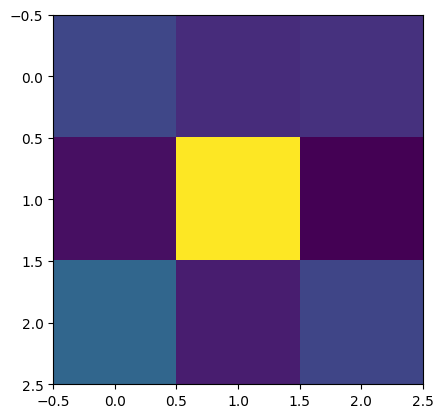

In [64]:
plt.imshow(fm_fw)